# "Record heat that canceled Twin Cities marathon spiked by climate change, some say" 

"Minnesota's changing climate helped push the record-setting temperature that led organizers to call off Sunday's Twin Cities Marathon, the first weather-related cancellation in the race's 40 year history." https://www.startribune.com/climate-change-marathon-minneapolis-temperature-runners-season-record-environment-twin-cities/600309222/

This analysis looks at the average and maximum temperature recorded by the DNR for the Twin Cities, and then compares it to the daily recorded high for the last 40 years of race data. 



In [50]:
import pandas as pd

# List of all the provided data files
# https://www.dnr.state.mn.us/climate/historical/daily-data.html?sid=mspthr&sname=Minneapolis/St%20Paul%20Threaded%20Record&sdate=1920-01-01&edate=1929-12-31 
files = [
    'data/1870.csv',
    'data/1880.csv',
    'data/1890.csv',
    'data/1900.csv',
    'data/1910.csv',
    'data/1920.csv',
    'data/1930.csv',
    'data/1940.csv',
    'data/1950.csv',
    'data/1960.csv',
    'data/1970.csv',
    'data/1980.csv',
    'data/1990.csv',
    'data/2000.csv',
    'data/2010.csv'
]

# Load and concatenate all the dataframes
all_data = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)

# Retain only the specified columns in the dataframe
columns_to_keep = ["Date", "Maximum Temperature degrees (F)", "Minimum Temperature degrees (F)"]
all_data = all_data[columns_to_keep]

# Convert the "Maximum Temperature degrees (F)" column to a numeric type
all_data["Maximum Temperature degrees (F)"] = pd.to_numeric(all_data["Maximum Temperature degrees (F)"], errors="coerce")

# Check the data types of the columns in the dataframe
all_data.dtypes


# Display the first few rows of the updated dataframe
all_data.head()


,Date,Maximum Temperature degrees (F),Minimum Temperature degrees (F)
0,1871-01-01,NaN,M
1,1871-01-02,NaN,M
2,1871-01-03,NaN,M
3,1871-01-04,NaN,M
4,1871-01-05,NaN,M


In [25]:
marathon_dates = pd.read_csv('data/twincities_marathon_dates.csv')

# Convert the Year, Month, and Day columns to a single 'Date' column
marathon_dates['Date'] = pd.to_datetime(marathon_dates[['Year', 'Month', 'Day']])

# Calculate the day of the year for each marathon date
marathon_dates['Day_of_Year'] = marathon_dates['Date'].dt.dayofyear

# Calculate the mean, median, mode, max, and min for the day of the year
mean_day = marathon_dates['Day_of_Year'].mean()
median_day = marathon_dates['Day_of_Year'].median()
mode_day = marathon_dates['Day_of_Year'].mode()[0]
max_day = marathon_dates['Day_of_Year'].max()
min_day = marathon_dates['Day_of_Year'].min()

print(f"Mean Day of the Year: {mean_day}")
print(f"Median Day of the Year: {median_day}")
print(f"Mode Day of the Year: {mode_day}")
print(f"Maximum Day of the Year: {max_day}")
print(f"Minimum Day of the Year: {min_day}")


Mean Day of the Year: 277.64102564102564
Median Day of the Year: 278.0
Mode Day of the Year: 276
Maximum Day of the Year: 283
Minimum Day of the Year: 274


In [42]:
# Convert the 'Date' column in the weather data to datetime
all_data['Date'] = pd.to_datetime(all_data['Date'])

# Filter the data for dates between October 1st and October 10th
october_data = all_data[all_data['Date'].dt.month == 10]
october_data = october_data[october_data['Date'].dt.day <= 10]

# Group by year and find the maximum temperature for each year
max_temps = october_data.groupby(october_data['Date'].dt.year)['Maximum Temperature degrees (F)'].max()

# Convert the results to a DataFrame for better visualization
max_temps_df = max_temps.reset_index()
max_temps_df.columns = ['Year', 'Max Temperature (Oct 1-10)']



In [34]:
!pip install matplotlib



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [43]:
# Extract actual temperatures on the marathon dates
actual_temps = all_data[all_data['Date'].isin(marathon_dates['Date'])][['Date', 'Maximum Temperature degrees (F)']]
actual_temps['Year'] = actual_temps['Date'].dt.year

# Merge the maximum and actual temperatures data
merged_data = max_temps_df.merge(actual_temps, on='Year', how='inner')


In [44]:
# Group by year and find the maximum temperature for each year from the entire dataset
all_max_temps = october_data.groupby(october_data['Date'].dt.year)['Maximum Temperature degrees (F)'].max()

# Convert the results to a DataFrame for visualization
all_max_temps_df = all_max_temps.reset_index()
all_max_temps_df.columns = ['Year', 'Max Temperature (Oct 1-10)']



In [45]:
!pip install seaborn
import seaborn as sns



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [46]:
# Calculate the average temperature for each year for the October 1-10 window again
avg_temps = october_data.groupby(october_data['Date'].dt.year)['Maximum Temperature degrees (F)'].mean()

# Convert the results to a DataFrame for visualization
avg_temps_df = avg_temps.reset_index()
avg_temps_df.columns = ['Year', 'Average Temperature (Oct 1-10)']




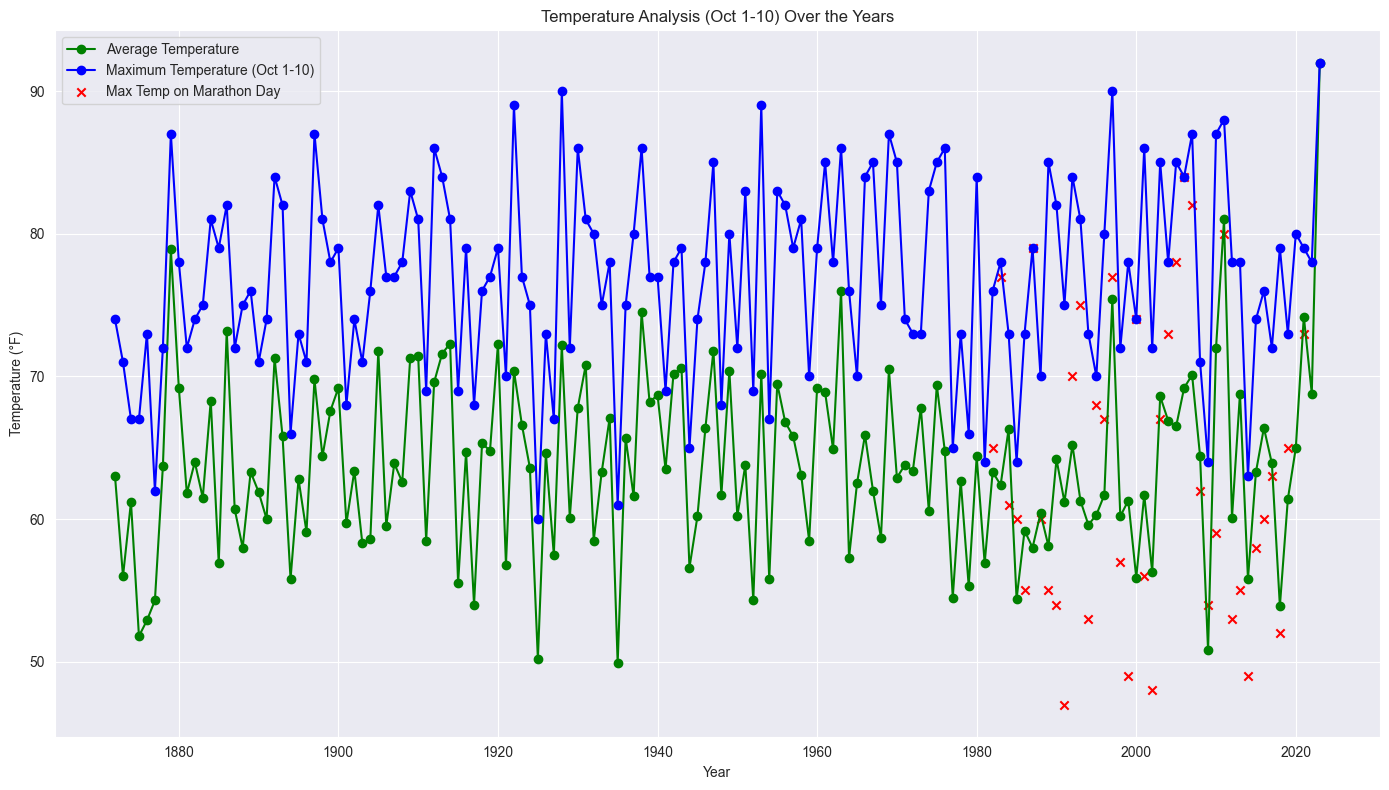

In [67]:
# # Plotting the data
import matplotlib.pyplot as plt
# Plot average, maximum temperatures, and actual max temperature on marathon day
plt.figure(figsize=(14, 8))
plt.plot(avg_temps.index, avg_temps, label='Average Temperature', color='green', marker='o')
plt.plot(max_temps.index, max_temps, label='Maximum Temperature (Oct 1-10)', color='blue', marker='o')
plt.scatter(actual_temps['Year'], actual_temps['Maximum Temperature degrees (F)'], label='Max Temp on Marathon Day', color='red', marker='x')
plt.xlabel('Year')
plt.ylabel('Temperature (°F)')
plt.title('Temperature Analysis (Oct 1-10) Over the Years')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## What observations do we draw from this graph?

* the Max temperature and average high temperature for the first 10 days of October (marathon time) is usually tightly coupled.
* the actual race day temperature sits on both sides of the average temperature
* We see that the average high temp and maximum high temp for the period was a lot lower from 2005-2020, than from the period 1990-2005.

## From this we could conclude:

* Given the race occurs anywhere between October 1 & October 10, and that the average high is significantly lower (~10 degrees on average) than the maximum for the period, the race almost as likely could have been run on a cooler day. 
* In the most recent 30 years, the second half of those years have had cooler average maximum temperatures, not warmer average maximum temperatures.

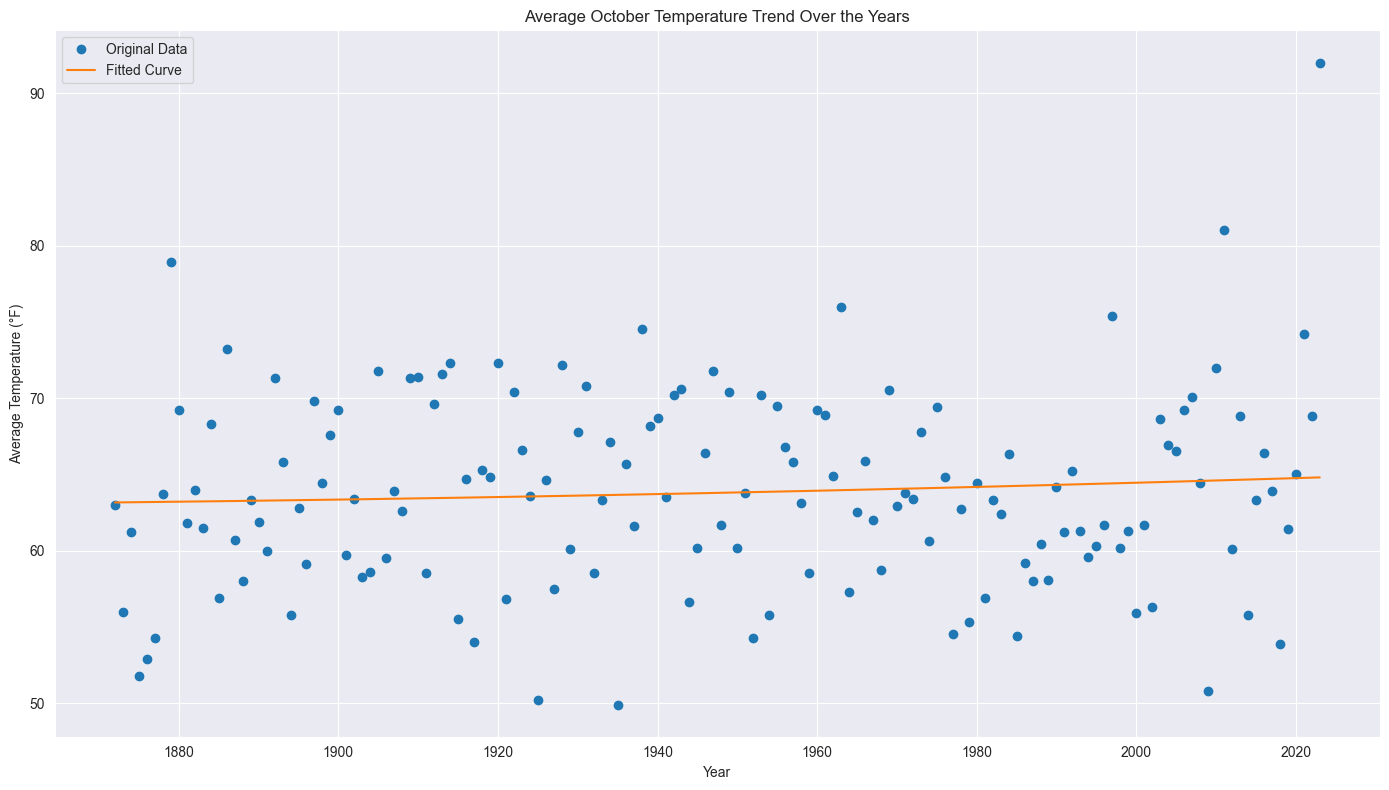

In [48]:
from numpy.polynomial.polynomial import Polynomial
import numpy as np

# Extract data for curve fitting
x = avg_temps.index.values
y = avg_temps.values

# Removing NaN values
non_nan_indices = ~np.isnan(y)
x_clean = x[non_nan_indices]
y_clean = y[non_nan_indices]

# Fit a polynomial of degree 2 (quadratic) to the data
p = Polynomial.fit(x_clean, y_clean, 2)

# Generate values based on the fitted polynomial
x_fit = np.linspace(x_clean.min(), x_clean.max(), 500)
y_fit = p(x_fit)

# Plot the original data and the fitted curve
plt.figure(figsize=(14, 8))
plt.plot(x_clean, y_clean, 'o', label='Original Data')
plt.plot(x_fit, y_fit, '-', label='Fitted Curve')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°F)')
plt.title('Average October Temperature Trend Over the Years')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [49]:
# Extract the coefficients of the fitted polynomial
coefficients = p.convert().coef

# For a quadratic polynomial of the form ax^2 + bx + c, the coefficients are [c, b, a]
c, b, a = coefficients

# The slope at any point x for a quadratic function is given by 2ax + b
# We can compute the slope at the midpoint of our data (which gives an average representation) 
mid_year = (x_clean.min() + x_clean.max()) / 2
slope_at_mid_year = 2 * a * mid_year + b

#this is the year over year degree f change for the dataset when constrained to only the first 10 days of october
slope_at_mid_year


0.010875040151996668

NOAA states that Earth’s temperature has risen by an average of 0.14° Fahrenheit (0.08° Celsius) per decade since 1880, which translates to a total increase of about 2° F over the period of years. 
The rate of warming since 1981 has been more than twice as fast, at 0.32° F (0.18° C) per decade.

Source: [Climate.gov](https://www.climate.gov/news-features/understanding-climate/climate-change-global-temperature#:~:text=Earth’s%20temperature%20has%20risen%20by,based%20on%20NOAA’s%20temperature%20data)

In [51]:
slope_at_mid_year * 10 # we can see this slope is within the order of magnitude compared to the NOAA climate data

0.10875040151996668

Both violin plots and box plots are graphical methods used to represent and understand the distribution of continuous data. Let's delve into each and discuss how to read them:

### Box Plot:

A box plot, also known as a whisker plot, displays a summary of a set of data values. It shows properties like the minimum, first quartile, median, third quartile, and maximum.

Key components:
1. **Box**: The main body of the box plot, which represents the interquartile range:
   - The **bottom line** of the box is the **first quartile (Q1)**, which is the median of the lower half of the dataset.
   - The **top line** of the box is the **third quartile (Q3)**, which is the median of the upper half of the dataset.
   - The **horizontal line** inside the box is the **median (Q2)** of the dataset.
2. **Whiskers**: These are the lines that extend from the top and bottom of the box. Typically, they represent the range within which the bulk of the values fall. There are various methods for calculating the length of the whiskers:
   - A common method is to set them 1.5 times the interquartile range (IQR) above Q3 and below Q1. The IQR is the difference between Q3 and Q1.
3. **Outliers**: Data points that fall outside the whiskers. These are usually represented as individual points or circles.

### Violin Plot:

A violin plot combines aspects of a box plot and a kernel density plot. It provides a visualization of the distribution of the data, its probability density, and its cumulative distribution.

Key components:
1. **Density Plot**: The outer shape (or the "violin" shape) shows the density estimation of the data at different values. Wider sections represent higher density (more data points).
2. **Box Plot**: Inside the violin plot, there's often a mini box plot that shows the median, quartiles, and possible whiskers.

How to read:
- The width of the plot at different values indicates the density of the data. A wider section means more data points lie at that particular value, while a narrow section means fewer data points.
- The white dot in the center often represents the median of the data.
- The thick bar in the center of the violin represents the interquartile range.
- The thin line represents the rest of the distribution, except for points deemed as outliers.

### Comparison:

- **Distribution**: While box plots show a summary of the data's distribution (through quartiles), violin plots show the full distribution of the data.
- **Detail**: Violin plots provide more detail about the distribution, such as its density and potential multiple modes.
- **Interpretability**: Box plots are generally more familiar and easier to interpret for a wide audience.

In summary, while a box plot gives you a quick summary of the central tendency, spread, and possible outliers in your data, a violin plot provides a more detailed look at the data's distribution. When analyzing temperature data, a box plot can quickly show you the range and median temperature, while a violin plot can indicate how temperatures are distributed and if there are multiple common temperature ranges (modes).

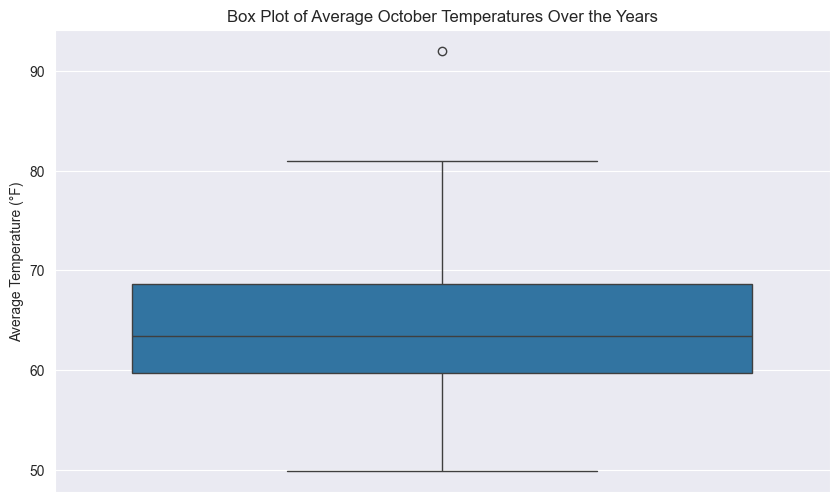

In [52]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=avg_temps.values)
plt.ylabel('Average Temperature (°F)')
plt.title('Box Plot of Average October Temperatures Over the Years')
plt.show()


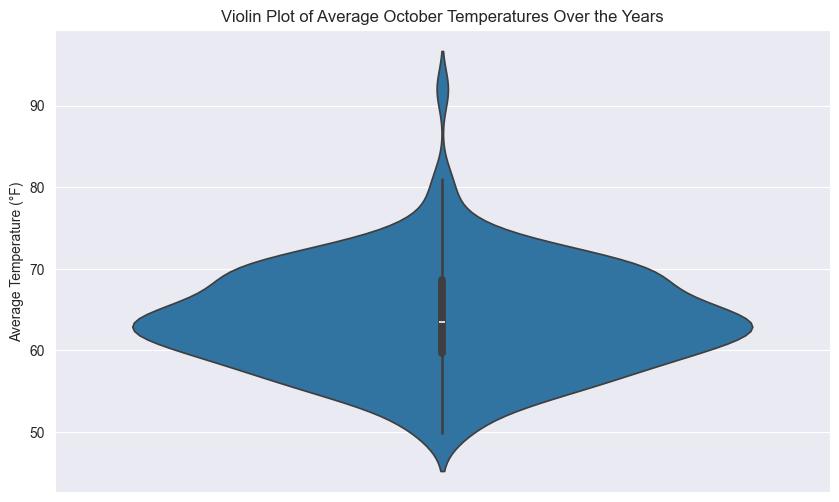

In [53]:
# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(y=avg_temps.values)
plt.ylabel('Average Temperature (°F)')
plt.title('Violin Plot of Average October Temperatures Over the Years')
plt.show()


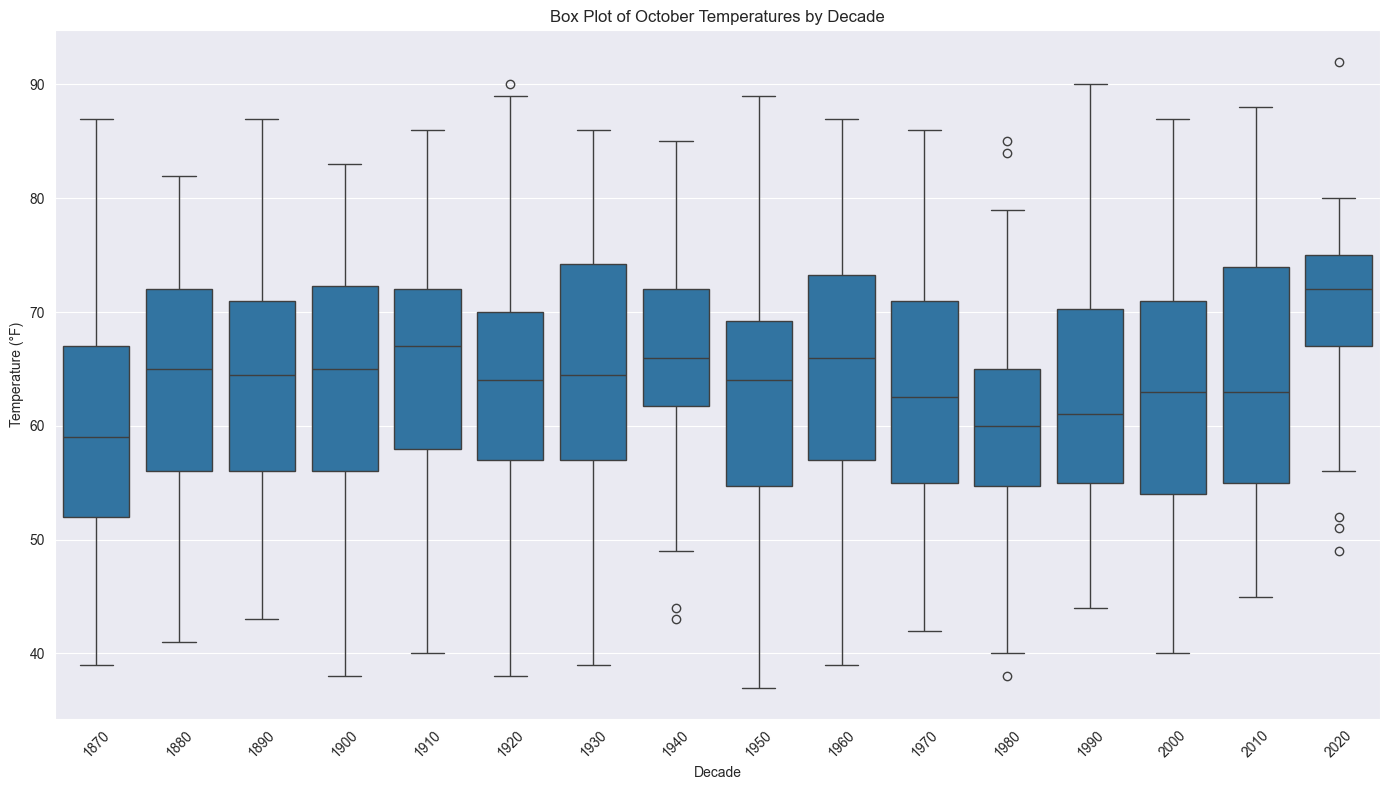

In [65]:
# Create a 'Decade' column in the october_data dataframe
october_data['Decade'] = (october_data['Date'].dt.year // 10) * 10

# Box plot by decade
plt.figure(figsize=(14, 8))
sns.boxplot(x=october_data['Decade'], y=october_data['Maximum Temperature degrees (F)'])
plt.title('Box Plot of October Temperatures by Decade')
plt.xlabel('Decade')
plt.ylabel('Temperature (°F)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


            Date  Maximum Temperature degrees (F)
3195  1879-10-01                             83.0
3199  1879-10-05                             87.0
3200  1879-10-06                             85.0
5758  1886-10-07                             82.0
7945  1892-10-02                             84.0
...          ...                              ...
51412 2011-10-06                             83.0
51413 2011-10-07                             85.0
51414 2011-10-08                             83.0
51415 2011-10-09                             83.0
55790 2023-10-01                             92.0

[64 rows x 2 columns]


/var/folders/gk/lh1_g1915q7dxyrn5srj8fy40000gp/T/ipykernel_25042/4023130674.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['25-Year Interval'] = (outliers['Date'].dt.year // 25) * 25


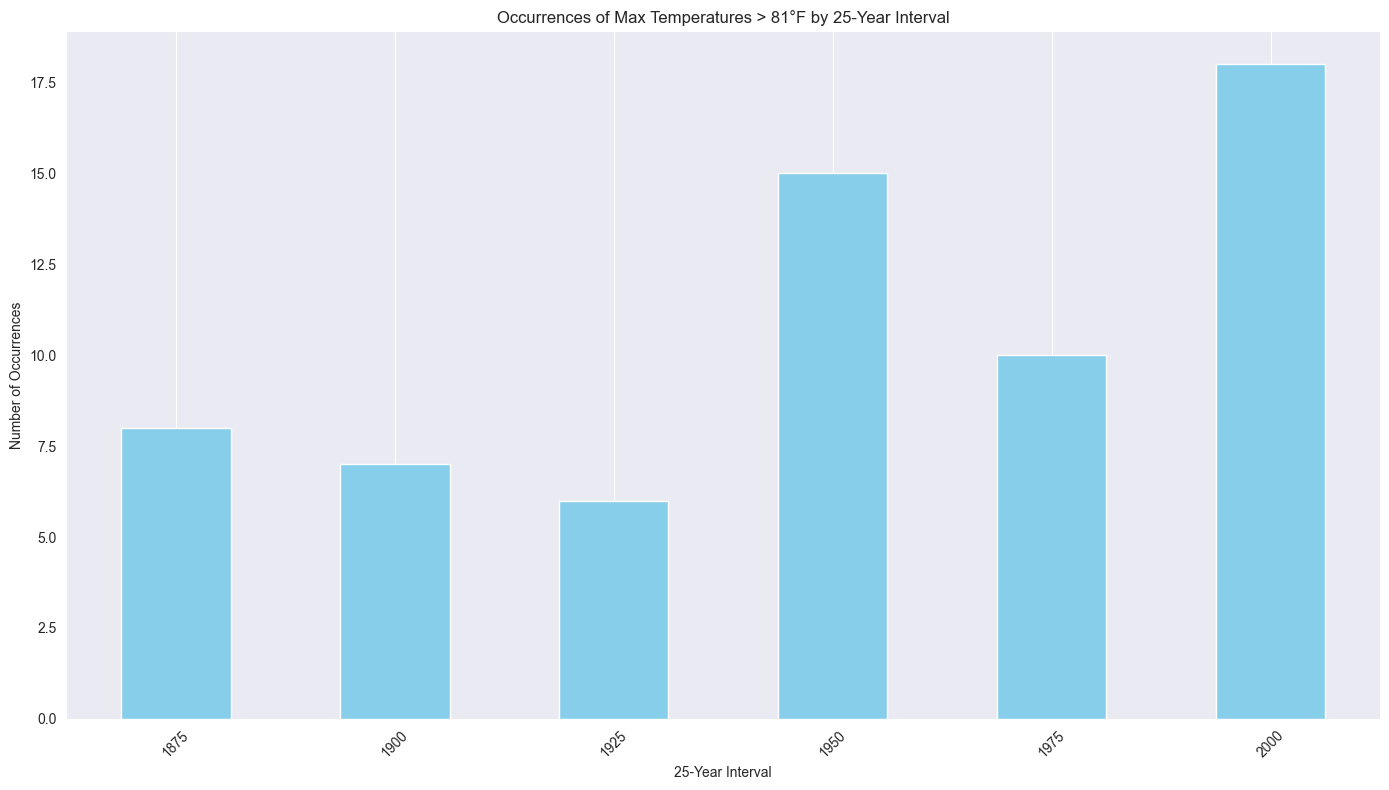

In [66]:
# Filter the data to get instances where the maximum temperature exceeded 81 degrees because its above the 3rd quartile from the box plot
outliers = october_data[october_data['Maximum Temperature degrees (F)'] > 81]

# Display the outliers
print(outliers[['Date', 'Maximum Temperature degrees (F)']])

# Create a '25-Year Interval' column in the outliers dataframe
outliers['25-Year Interval'] = (outliers['Date'].dt.year // 25) * 25

# Count the occurrences in each 25-year interval
occurrences_by_interval = outliers.groupby('25-Year Interval').size()

# Plot the occurrences by 25-year interval
plt.figure(figsize=(14, 8))
occurrences_by_interval.plot(kind='bar', color='skyblue')
plt.title('Occurrences of Max Temperatures > 81°F by 25-Year Interval')
plt.xlabel('25-Year Interval')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


## What observations can we make about this data?

* The period of 1950-1975 had more occurrences of maximum temperatures being higher than the 3rd quartile than the period of 1975-2000, but less than the period of 2000-2023

## From which we are left with :

1. Given that the DNR data roughly fits the NOAA data for decade increase in temperature
2. Given that there is a wide variability of average daily maximum temperatures for the period
3. Given that there is a higher occurrence of outliers in the period 1950-1975, than for 1975-2000, 

The data is far from conclusive that climate change had any impact on the 2023 Twin Cities Marathon, the global temperature is increasing, but there is a very high variability in early October temperatures, as there has always been since we kept accurate temperature measurements. 

# To Conclude:
Using the temperature from a single weekend to draw conclusions about climate change is generally not appropriate. Here's why:

1. **Variability vs. Trend**: Weather is inherently variable and can be influenced by a multitude of factors. Climate change, on the other hand, refers to long-term shifts and patterns in temperature and weather. A single weekend's weather is a short-term event and does not necessarily reflect the long-term trends that are indicative of climate change.

2. **Anecdotal Evidence**: Relying on a single data point (or a very limited set of data points) can be misleading. It's considered anecdotal evidence, which isn't robust or comprehensive enough to draw scientific conclusions.

3. **Local vs. Global**: Climate change is a global phenomenon, whereas weather events are local. A particularly hot weekend in one location does not necessarily mean that similar conditions occurred everywhere. 

4. **Weather vs. Climate**: It's essential to distinguish between weather and climate. Weather refers to short-term changes in atmospheric conditions, while climate refers to long-term trends. A common saying among climate scientists is, "Climate is what you expect; weather is what you get."

5. **Statistical Significance**: For a measurement to be scientifically meaningful, it usually needs to be statistically significant. This often requires looking at large sets of data to determine whether an observed trend is likely due to a specific cause (like human-induced global warming) rather than random chance.

# Editorial, Limitations & Clarifications

1. This is not a peer reviewed data science submission
2. I only used temperature, not humidity or sun, to compare the conditions in early October, just as the author of the article did.
3. The `black flag` condition was based more than temperature and also factored in (to my understanding) the capacity of local hospitals. i.e. they could have had the run, but likely a lot of people would have needed medical attention as the article suggests.
4. The purpose of this notebook is to help demonstrate that 'climate change' as a narrative to every day occurrences is not an appropriate analysis. What happened to the 2023 Twin Cities Marathon was bad weather, not climate change. 
5. When we incorrectly use 'climate change' as mechanism to explain every day weather outside the context of climate cycles, we do a dis-service to our community.  
6. 'Trust the science' is more a religious mantra than a commitment to good practices. 